# Trending YouTube Video Statistics EDA

#### In this notebook, we will analyse YouTube trending videos using the US dataset downloaded from Kaggle
#### https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv

### Loading libraries and dataset

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv("USvideos.csv")

In [90]:
# Checking the file's shape
df.shape

(40949, 16)

#### We can see that the dataset has 40.949 observations and 16 variables

In [4]:
# Looking at the top 5 rows
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
# Checking columns datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

#### There are null values in the "description" column

In [6]:
# Missing values
df.dropna(inplace=True)

In [7]:
df.shape

(40379, 16)

#### Now we have 40.379 observations and 16 variables

In [8]:
# Counting unique values
df.nunique()

video_id                   6254
trending_date               205
title                      6357
channel_title              2142
category_id                  16
publish_time               6172
tags                       6008
views                     39927
likes                     29664
dislikes                   8460
comment_count             13684
thumbnail_link             6255
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [249]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [91]:
# Loading json with category names
newcategory = {}

with open('US_category_id.json') as json_file:
    datajson = json.load(json_file)
    for item in datajson['items']:
        newcategory[int(item['id'])] = item['snippet']['title']
        
newcategory

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [92]:
df['category_name'] = [newcategory[x] for x in df['category_id']]

In [93]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy


### Top 15 trending channels

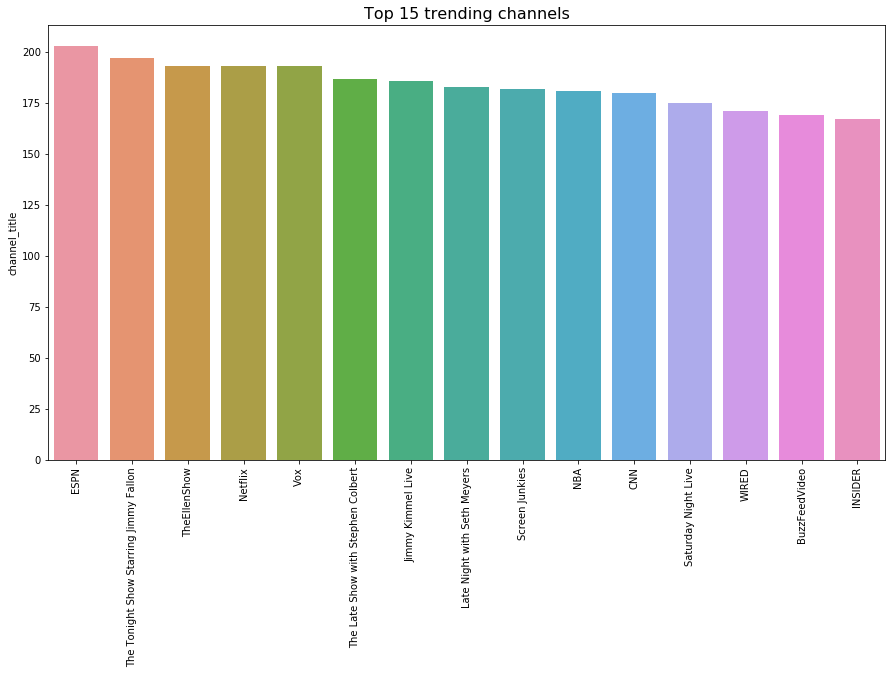

In [294]:
top_channel = pd.DataFrame(df['channel_title'].value_counts().head(15))

plt.figure(figsize = (15,8))
categorychart = sns.barplot(
    x=top_channel.index,
    y='channel_title',
    data = top_channel
)
plt.title('Top 15 trending channels', fontsize=16)
tl = categorychart.set_xticklabels(categorychart.get_xticklabels(), rotation=90)

In [ ]:
### Separar a data de trending time e publish time

### video que ficou trending por mais dias

### publish hour que mais foi publicado

### Checking duplicated video_id

In [239]:
df['video_id'].duplicated().any()

True

In [240]:
df[df['video_id']=='VYOjWnS4cMY']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
33351,VYOjWnS4cMY,18.08.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
33557,VYOjWnS4cMY,18.09.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",47169016,1841540,79717,194822,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
33772,VYOjWnS4cMY,18.10.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",60776509,2183732,104377,232723,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
33983,VYOjWnS4cMY,18.11.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",73432600,2478904,124290,263984,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
34202,VYOjWnS4cMY,18.12.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",85092067,2735961,140711,289682,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
34420,VYOjWnS4cMY,18.13.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",98938809,3037293,161812,319502,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
34850,VYOjWnS4cMY,18.15.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",116581406,3388289,186591,354187,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
35057,VYOjWnS4cMY,18.16.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",126191952,3587455,205995,377394,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
35265,VYOjWnS4cMY,18.17.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",134839555,3749810,226641,398351,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music
35474,VYOjWnS4cMY,18.18.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",142421830,3885070,241386,414109,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,Music


#### The same video was trending on different days, so we are going to remove video_id duplicates

In [241]:
#Removing duplicate rows with the same video_id, leaving only the last per video_id
newdf = df.sort_values('views', ascending=False).drop_duplicates('video_id').sort_index()
newdf.shape

(6351, 17)

#### Now we have 6.351 observations and 17 variables

### Counting videos by category

In [242]:
# Count videos by category
newdf.category_name.value_counts()

Entertainment            1621
Music                     801
Howto & Style             594
Comedy                    544
News & Politics           504
People & Blogs            495
Sports                    449
Science & Technology      381
Film & Animation          320
Education                 251
Pets & Animals            140
Gaming                    103
Autos & Vehicles           71
Travel & Events            59
Nonprofits & Activism      14
Shows                       4
Name: category_name, dtype: int64

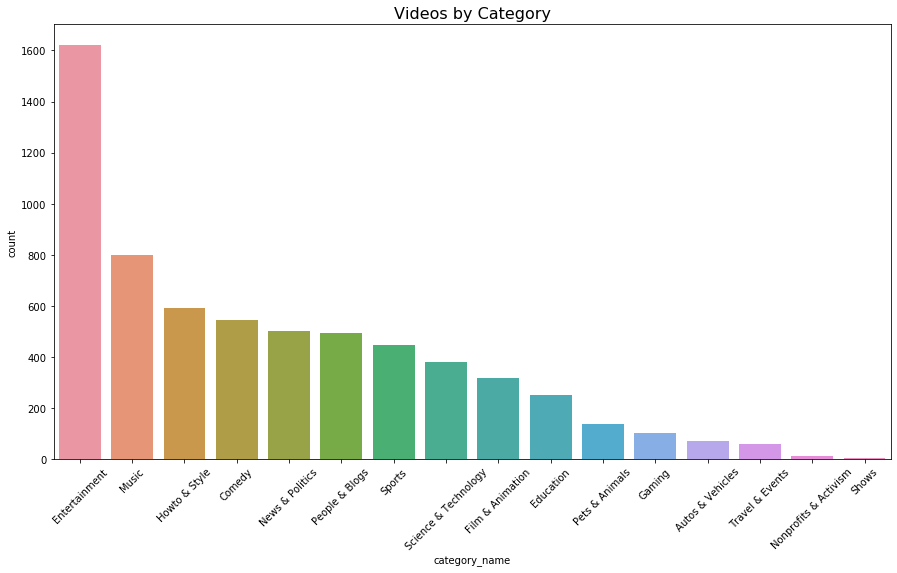

In [292]:
plt.figure(figsize = (15,8))
categorychart = sns.countplot(
    x='category_name',
    data = newdf,
    order = newdf['category_name'].value_counts().index
)
plt.title('Videos by Category', fontsize=16)
tl = categorychart.set_xticklabels(categorychart.get_xticklabels(), rotation=45)

#### We have more Entertainment and Music videos than Shows in this dataset

### Top 15 most visualized videos

In [148]:
# Showing top 15 most visualized videos (chart)
vizdata = newdf[filtered_columns].nlargest(15,'views')
vizdata

,video_id,trending_date,title,views,likes,dislikes,comment_count,category_name
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,225211923,5023450,343541,517232,Music
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,3093544,1643059,810698,Entertainment
34708,ffxKSjUwKdU,18.14.05,Ariana Grande - No Tears Left To Cry,148689896,3094021,129502,242039,Music
34888,zEf423kYfqk,18.15.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",139334502,1425496,119798,83941,Music
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920,5613827,206892,1228655,Music
34747,M4ZoCHID9GI,18.14.05,The Weeknd - Call Out My Name (Official Video),122544931,1427436,40837,55320,Music
2587,TyHvyGVs42U,17.26.11,"Luis Fonsi, Demi Lovato - Échame La Culpa",102012605,2376636,117196,134224,Music
40869,xTlNMmZKwpA,18.14.06,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",94254507,1816753,102474,101077,Music
4997,6ZfuNTqbHE8,17.08.12,Marvel Studios' Avengers: Infinity War Officia...,91933007,2625661,53709,350458,Entertainment
25947,-BQJo3vK8O8,18.25.03,Maluma - El Préstamo (Official Video),87264467,815369,71494,35945,Music


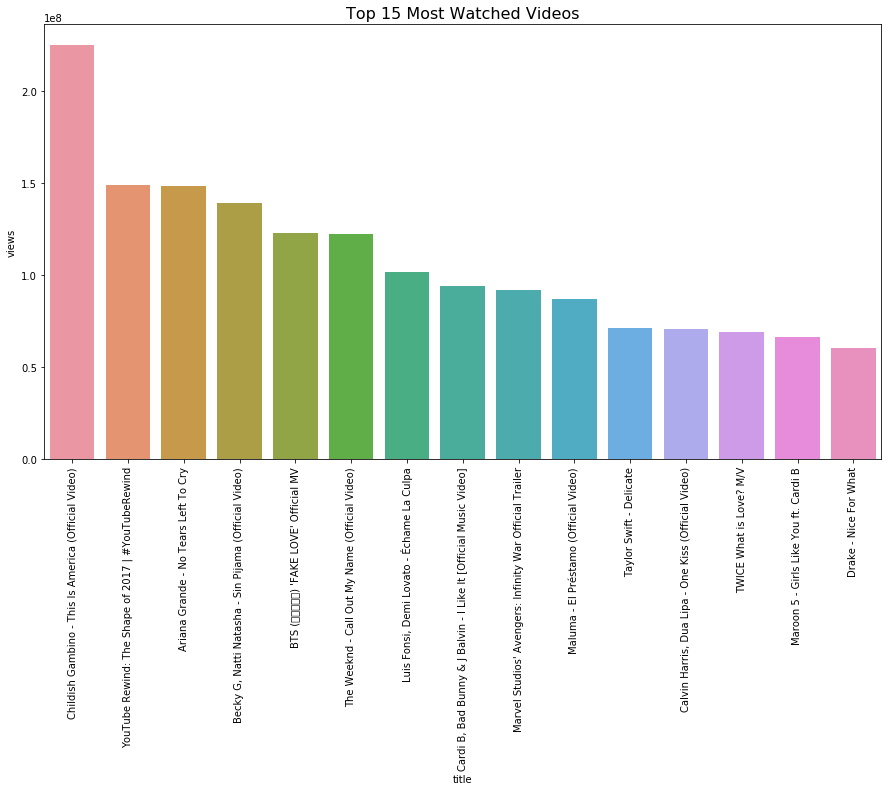

In [149]:
plt.figure(figsize = (15,8))
vizchart = sns.barplot(x='title', y='views', data=vizdata)
plt.title('Top 15 Most Watched Videos', fontsize=16)
tl = vizchart.set_xticklabels(vizchart.get_xticklabels(), rotation=90, fontsize=10)

### Top 15 most liked videos

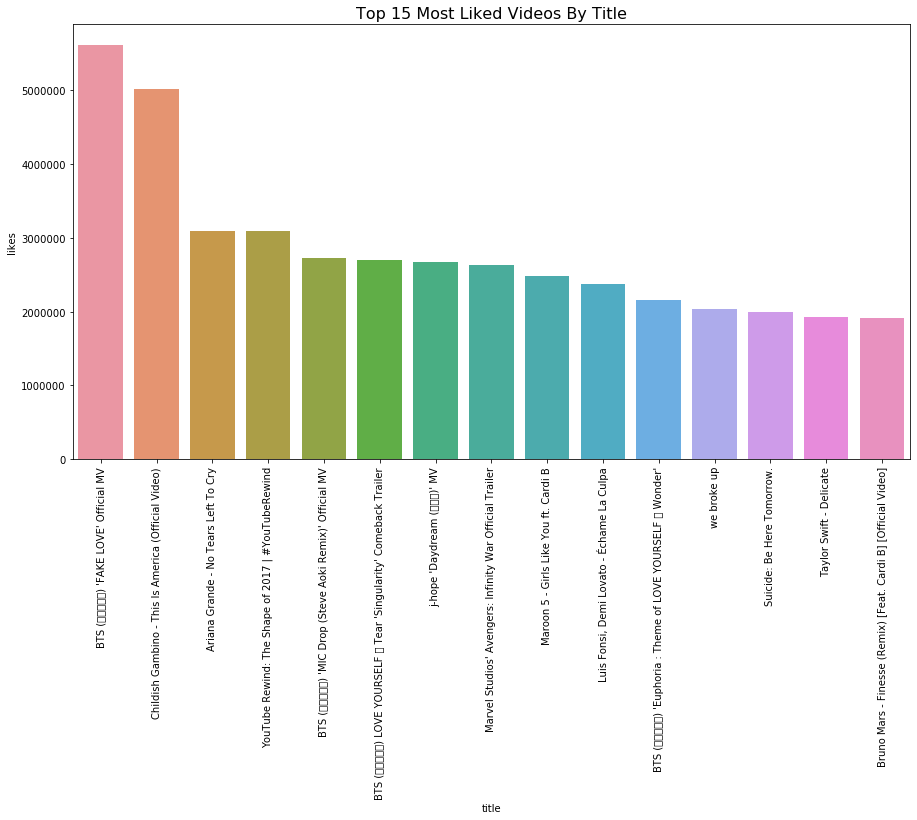

In [150]:
# Showing top 15 most liked videos (chart)
likedata = newdf[filtered_columns].nlargest(15,'likes')
plt.figure(figsize = (15,8))
likechart = sns.barplot(x='title', y='likes', data=likedata)
plt.title('Top 15 Most Liked Videos By Title', fontsize=16)
tl = likechart.set_xticklabels(likechart.get_xticklabels(), rotation=90, fontsize=10)

#### Note that BTS appears 4 times in the top 15 most liked videos

In [151]:
# Showing top 15 most disliked videos
dislikedata = newdf[filtered_columns].nlargest(15,'dislikes')
dislikedata

,video_id,trending_date,title,views,likes,dislikes,comment_count,category_name
11323,QwZT7T-TXT0,18.09.01,So Sorry.,37539570,1402578,1674420,1361580,Entertainment
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,3093544,1643059,810698,Entertainment
15571,oWjxSkJpxFU,18.01.02,Suicide: Be Here Tomorrow.,24286474,1988746,497847,658130,Nonprofits & Activism
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,225211923,5023450,343541,517232,Music
17063,_5d-sQ7Fh5M,18.09.02,LOGAN PAUL IS BACK!,14161833,1216340,291900,436698,Entertainment
7594,LFhT6H6pRWg,17.21.12,PSA from Chairman of the FCC Ajit Pai,1205682,9572,228426,29634,People & Blogs
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,10306119,357079,212976,144795,Gaming
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920,5613827,206892,1228655,Music
20939,V5cOvyDpWfM,18.28.02,Fergie Performs The U.S. National Anthem / 201...,21005589,59281,176903,65181,Sports
9967,WS7f5xpGYn8,18.02.01,Katy Perry - Hey Hey Hey (Official),33420138,821971,165109,81388,Music


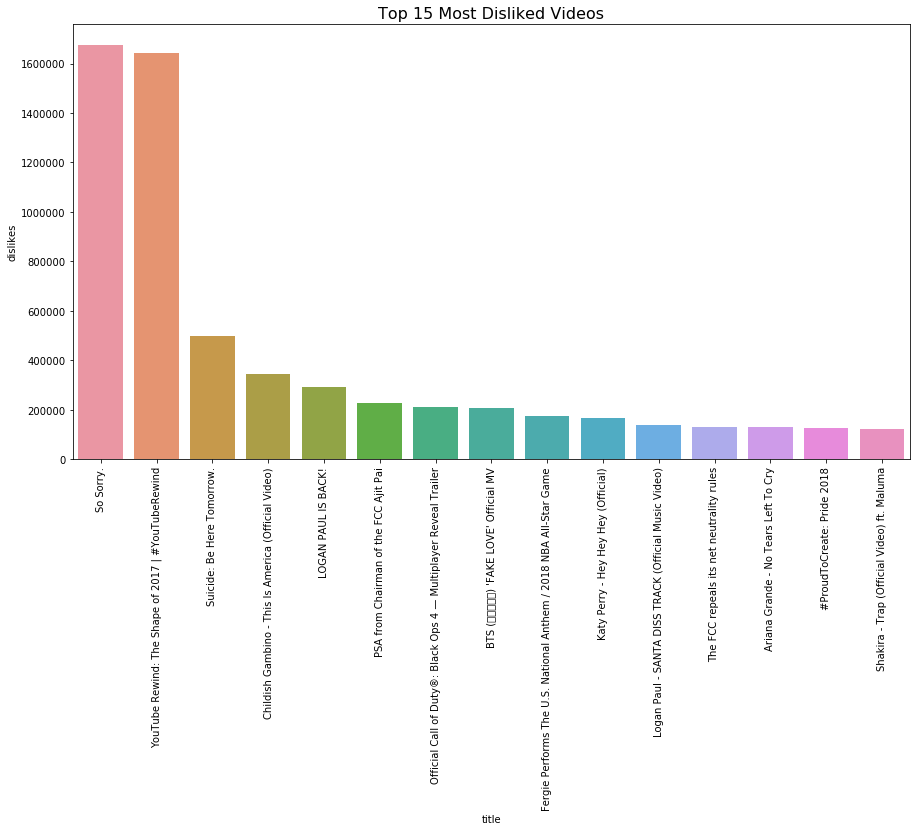

In [152]:
plt.figure(figsize = (15,8))
dislikechart = sns.barplot(x='title', y='dislikes', data=dislikedata)
plt.title('Top 15 Most Disliked Videos', fontsize=16)
tl = dislikechart.set_xticklabels(dislikechart.get_xticklabels(), rotation=90, fontsize=10)

In [154]:
# Showing top 15 most commented videos
comdata = newdf[filtered_columns].nlargest(15,'comment_count')
comdata

,video_id,trending_date,title,views,likes,dislikes,comment_count,category_name
11323,QwZT7T-TXT0,18.09.01,So Sorry.,37539570,1402578,1674420,1361580,Entertainment
38273,7C2z4GqqS5E,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,123010920,5613827,206892,1228655,Music
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,149376127,3093544,1643059,810698,Entertainment
15571,oWjxSkJpxFU,18.01.02,Suicide: Be Here Tomorrow.,24286474,1988746,497847,658130,Nonprofits & Activism
3581,kTlv5_Bs8aw,17.01.12,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,36857298,2729292,47896,546100,Music
38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,225211923,5023450,343541,517232,Music
22040,OK3GJ0WIQ8s,18.06.03,j-hope 'Daydream (백일몽)' MV,23416810,2672431,29088,477233,Music
17063,_5d-sQ7Fh5M,18.09.02,LOGAN PAUL IS BACK!,14161833,1216340,291900,436698,Entertainment
30249,FhllRWReNEE,18.22.04,Melting Every Lipstick From Sephora Together,7645235,402569,9373,383762,People & Blogs
35080,p8npDG2ulKQ,18.16.05,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,29741771,2700800,29341,371864,Music


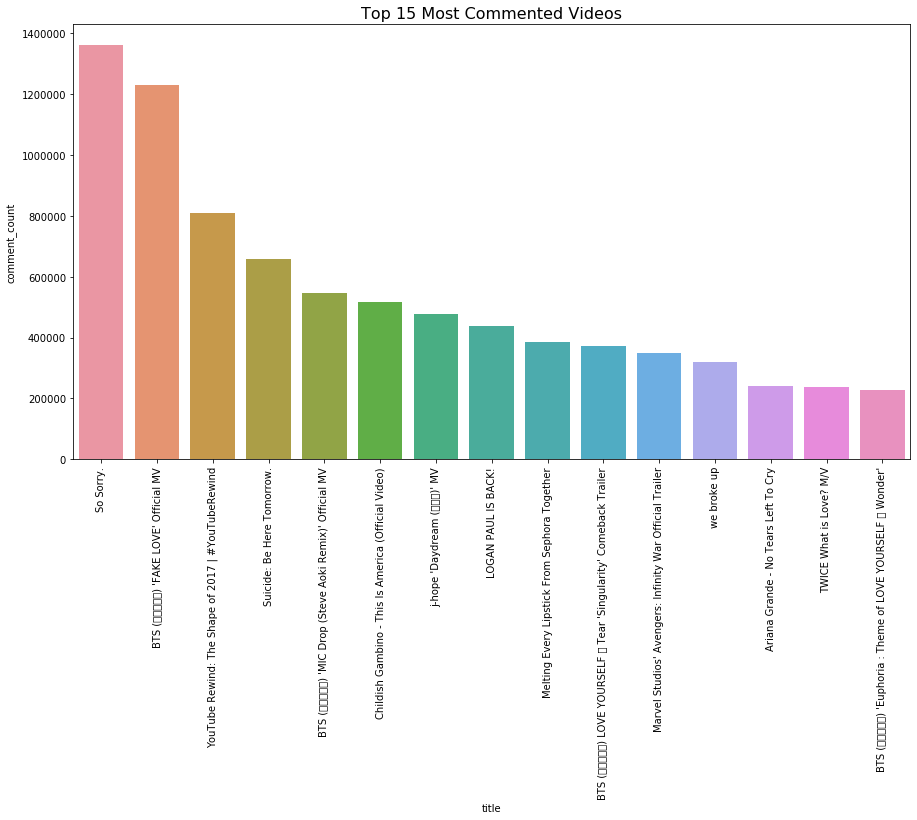

In [157]:
plt.figure(figsize = (15,8))
comchart = sns.barplot(x='title', y='comment_count', data=comdata)
plt.title('Top 15 Most Commented Videos', fontsize=16)
tl = comchart.set_xticklabels(comchart.get_xticklabels(), rotation=90, fontsize=10)

### Data by category

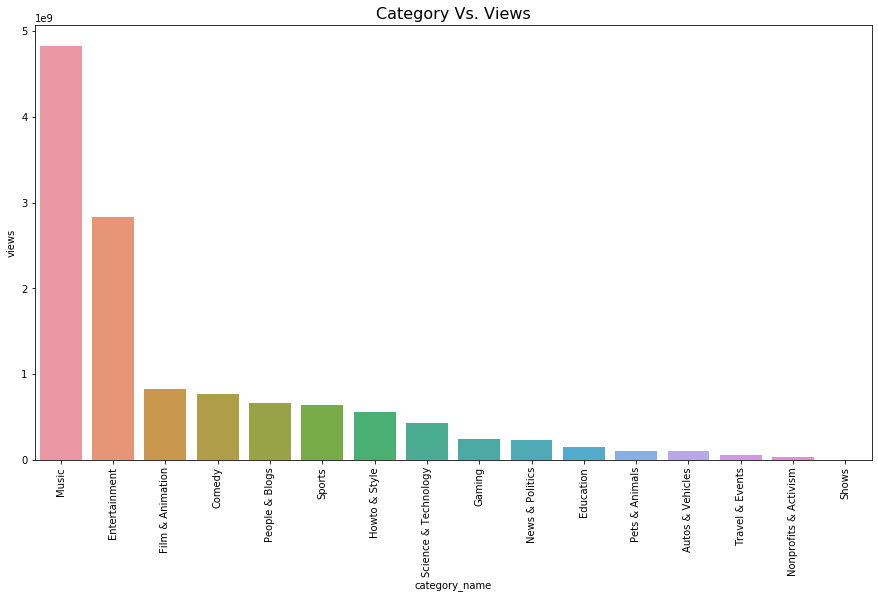

In [246]:
#Categories by amount of views
catv = newdf.groupby('category_name')['views'].sum().sort_values(ascending = False)
catvdf = pd.DataFrame(catv)

plt.figure(figsize = (15,8))
catvchart = sns.barplot(x=catvdf.index, y='views', data=catvdf)
plt.title('Category Vs. Views', fontsize=16)
tl = catvchart.set_xticklabels(catvchart.get_xticklabels(), rotation=90, fontsize=10)

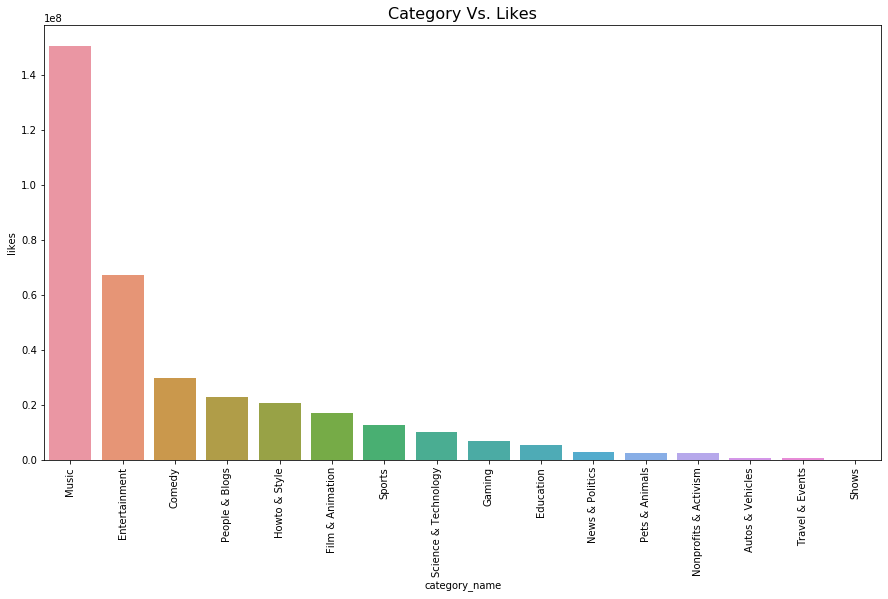

In [247]:
#Categories by amount of likes
catl = newdf.groupby('category_name')['likes'].sum().sort_values(ascending = False)
catldf = pd.DataFrame(catl)

plt.figure(figsize = (15,8))
catlchart = sns.barplot(x=catldf.index, y='likes', data=catldf)
plt.title('Category Vs. Likes', fontsize=16)
tl = catlchart.set_xticklabels(catlchart.get_xticklabels(), rotation=90, fontsize=10)

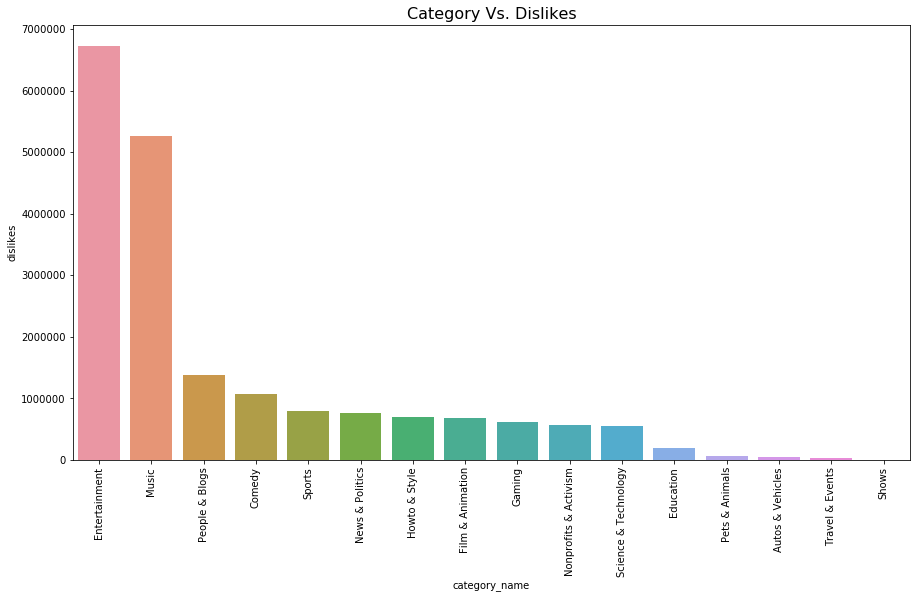

In [248]:
#Categories by amount of dislikes
catd = newdf.groupby('category_name')['dislikes'].sum().sort_values(ascending = False)
catddf = pd.DataFrame(catd)

plt.figure(figsize = (15,8))
catdchart = sns.barplot(x=catddf.index, y='dislikes', data=catddf)
plt.title('Category Vs. Dislikes', fontsize=16)
tl = catdchart.set_xticklabels(catdchart.get_xticklabels(), rotation=90, fontsize=10)

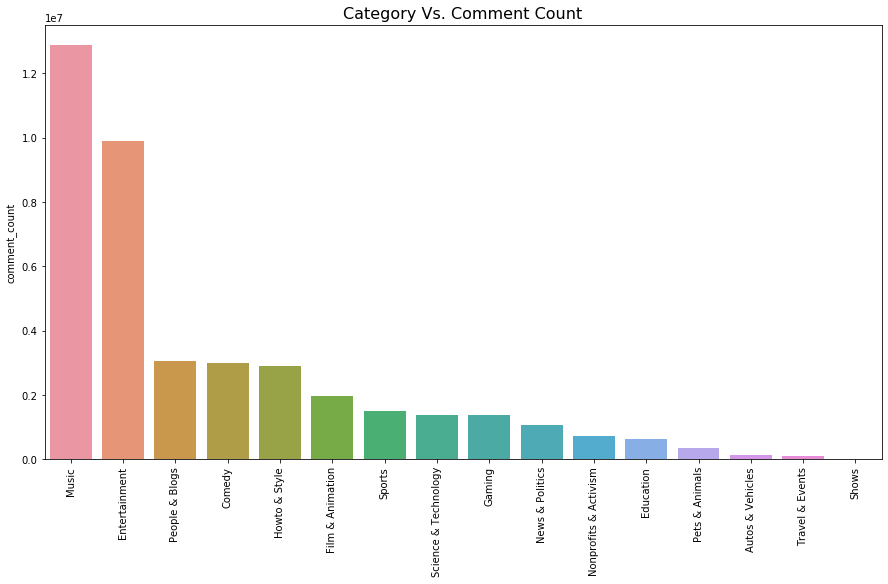

In [254]:
#Categories by amount of comments
catc = newdf.groupby('category_name')['comment_count'].sum().sort_values(ascending = False)
catcdf = pd.DataFrame(catc)

plt.figure(figsize = (15,8))
catcchart = sns.barplot(x=catcdf.index.values, y='comment_count', data=catcdf)
plt.title('Category Vs. Comment Count', fontsize=16)
tl = catcchart.set_xticklabels(catcchart.get_xticklabels(), rotation=90, fontsize=10)

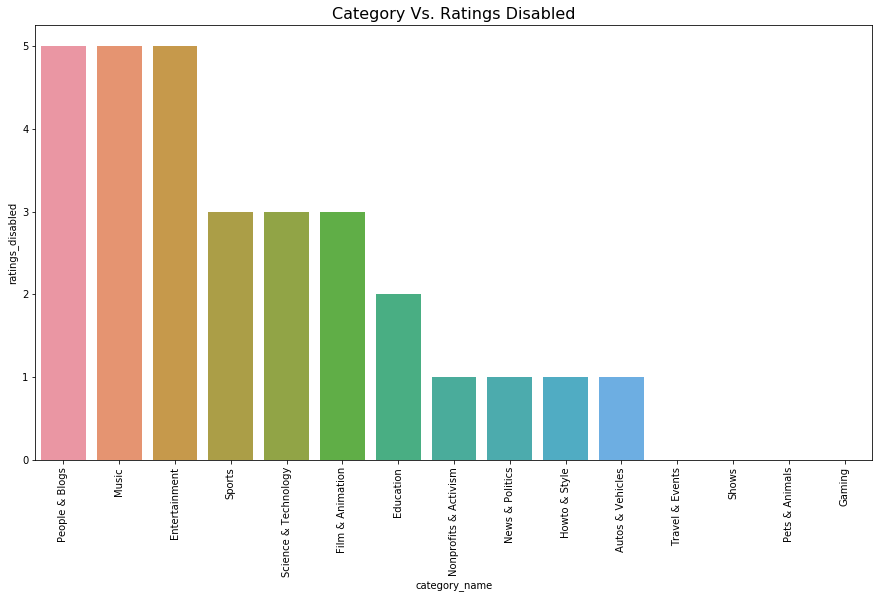

In [269]:
catrd = newdf.groupby('category_name')['ratings_disabled'].sum().sort_values(ascending = False)[:15]
catrddf = pd.DataFrame(catrd)
catrddf

plt.figure(figsize = (15,8))
catrdchart = sns.barplot(x=catrddf.index, y='ratings_disabled', data=catrddf)
plt.title('Category Vs. Ratings Disabled', fontsize=16)
tl = catrdchart.set_xticklabels(catrdchart.get_xticklabels(), rotation=90, fontsize=10)

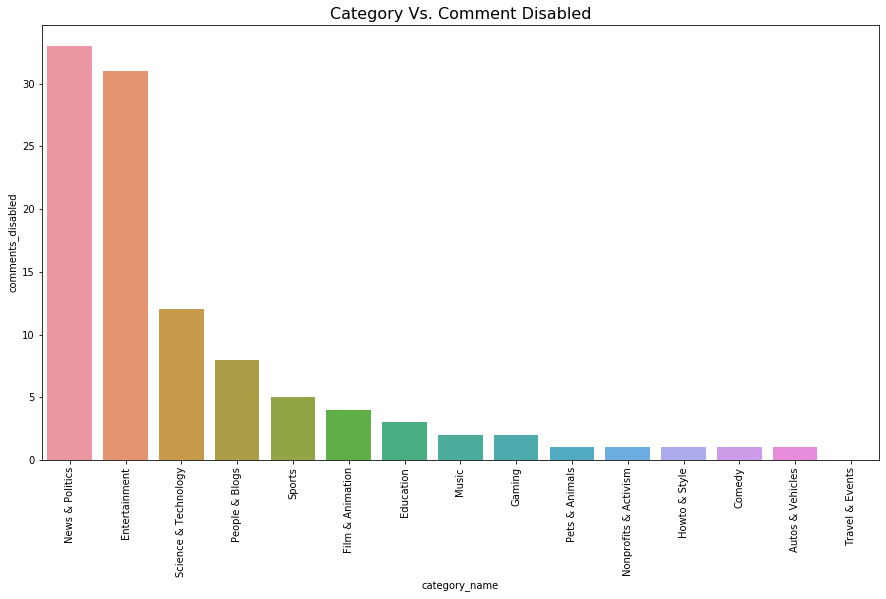

In [271]:
catcd = newdf.groupby('category_name')['comments_disabled'].sum().sort_values(ascending = False)[:15]
catcddf = pd.DataFrame(catcd)
catcddf

plt.figure(figsize = (15,8))
catcdchart = sns.barplot(x=catcddf.index, y='comments_disabled', data=catcddf)
plt.title('Category Vs. Comment Disabled', fontsize=16)
tl = catcdchart.set_xticklabels(catcdchart.get_xticklabels(), rotation=90, fontsize=10)

#### News & Politics is the top category with comments disabled

### Data by channel title

#### Top 15 trending channel title

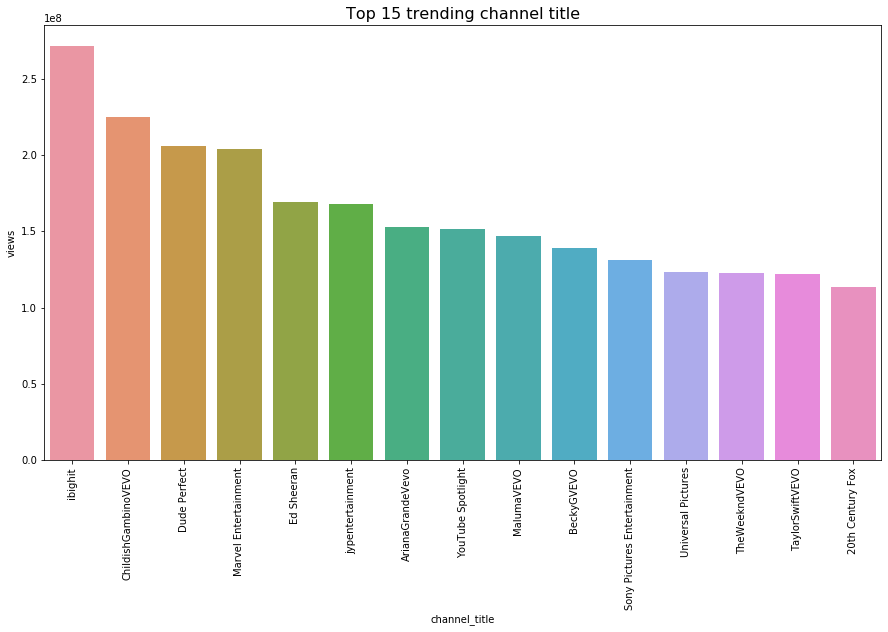

In [256]:
channeltitle = newdf.groupby('channel_title')['views'].sum().sort_values(ascending = False)[:15]
ctdf = pd.DataFrame(channeltitle)

plt.figure(figsize = (15,8))
ctchart = sns.barplot(x=ctdf.index, y='views', data=ctdf)
plt.title('Top 15 trending channel title', fontsize=16)
tl = ctchart.set_xticklabels(ctchart.get_xticklabels(), rotation=90, fontsize=10)

In [ ]:
# Top 3 channel title's within each category



### Data distribution

In [173]:
#Log transformation
mainvariables = ['views', 'likes', 'dislikes', 'comment_count']
df_log = newdf[mainvariables].applymap(lambda x: np.log(x+1))

# rename columns
df_log.columns = 'log_' + df_log.columns

# reset index
df_log.reset_index(drop=True, inplace=True)

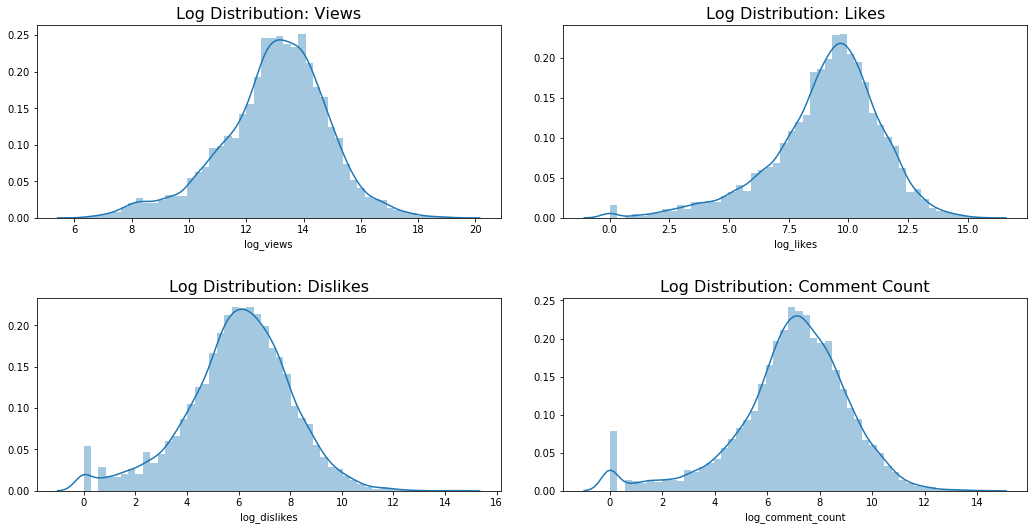

In [189]:
plt.figure(figsize = (15,8))

plt.subplot(221)
vcdist = sns.distplot(df_log['log_views'])
vcdist.set_title("Log Distribution: Views", fontsize=16)

plt.subplot(222)
lcdist = sns.distplot(df_log['log_likes'])
lcdist.set_title("Log Distribution: Likes", fontsize=16)

plt.subplot(223)
dcdist = sns.distplot(df_log['log_dislikes'])
dcdist.set_title("Log Distribution: Dislikes", fontsize=16)

plt.subplot(224)
ccdist = sns.distplot(df_log['log_comment_count'])
ccdist.set_title("Log Distribution: Comment Count", fontsize=16)

plt.tight_layout(pad=3.0)

### Correlation between variables

In [158]:
corr = newdf[mainvariables].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.834694,0.441878,0.573862
likes,0.834694,1.000000,0.420539,0.765180
dislikes,0.441878,0.420539,1.000000,0.734943
comment_count,0.573862,0.765180,0.734943,1.000000


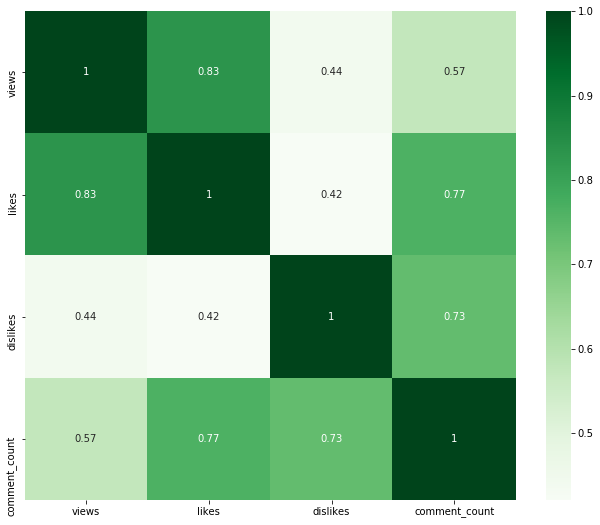

In [275]:
plt.subplots(figsize=(11, 9))
# plot heatmap
sns.heatmap(corr, cmap="Greens", annot=True)
plt.show()

Text(0.5, 1.0, 'Likes Vs. Views')

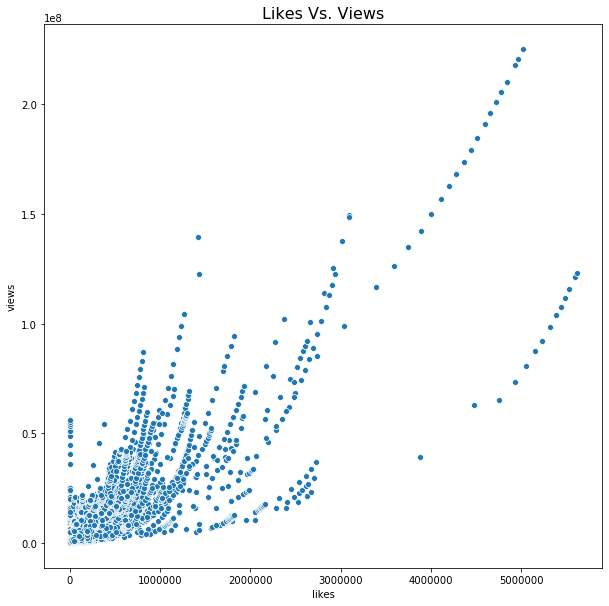

In [164]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='likes', y='views', data=df)
plt.title('Likes Vs. Views', fontsize=16)

Text(0.5, 1.0, 'Dislikes Vs. Views')

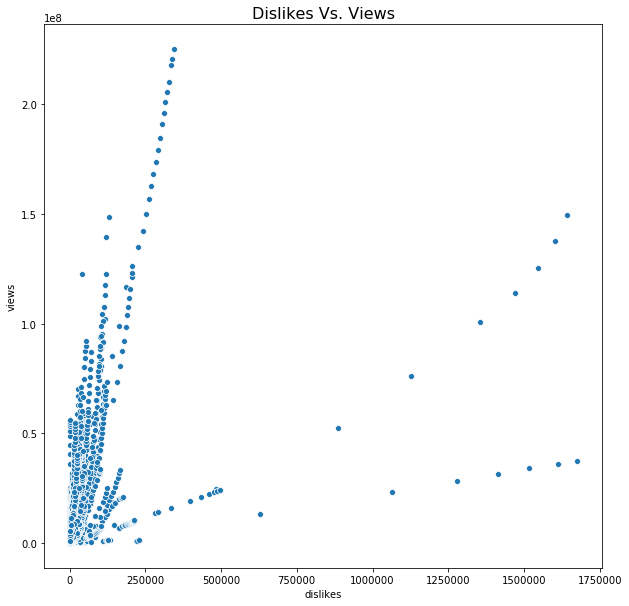

In [163]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='dislikes', y='views', data=df)
plt.title('Dislikes Vs. Views', fontsize=16)

Text(0.5, 1.0, 'Comment Count Vs. Views')

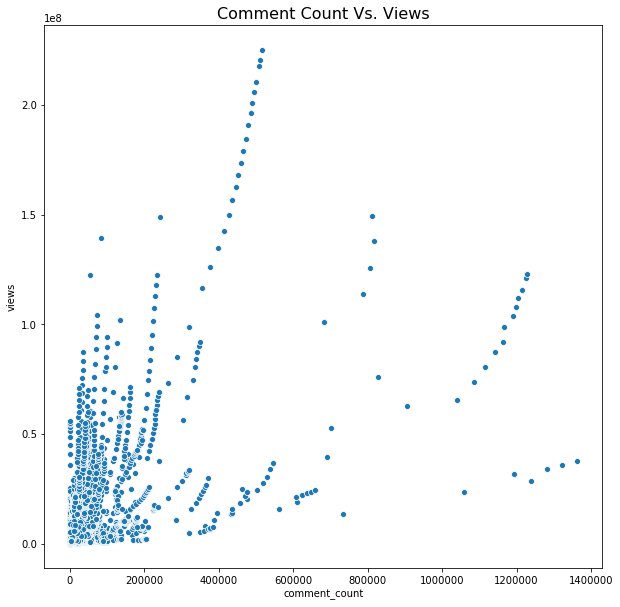

In [165]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='comment_count', y='views', data=df)
plt.title('Comment Count Vs. Views', fontsize=16)

In [ ]:
# word cloud videos with the most likes

In [ ]:
# word cloud videos with the most dislikes